<a href="https://colab.research.google.com/github/Mswetham/advanced-bank-management/blob/main/python_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
    OrderID       Date Customer     Category  Quantity  Price  Revenue
0         1 2024-01-01   Vikram     Clothing         3   1668     5004
1         2 2024-01-02    Meena     Clothing         2   4100     8200
2         3 2024-01-03    Priya     Clothing         3   2838     8514
3         4 2024-01-04    Meena    Groceries         3   3598    10794
4         5 2024-01-05    Meena    Groceries         2   4013     8026
5         6 2024-01-06     Arun        Books         2   1166     2332
6         7 2024-01-07    Priya        Books         2   4480     8960
7         8 2024-01-08    Priya  Electronics         1   2544     2544
8         9 2024-01-09    Priya  Electronics         4   4207    16828
9        10 2024-01-10    Meena        Books         1   3473     3473
10       11 2024-01-11   Vikram    Groceries         1   4069     4069
11       12 2024-01-12    Priya     Clothing         3   2646     7938
12       13 2024-01-13    Meena        Books         2    853   

/tmp/ipython-input-3204681155.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Revenue", data=category_sales, palette="viridis")


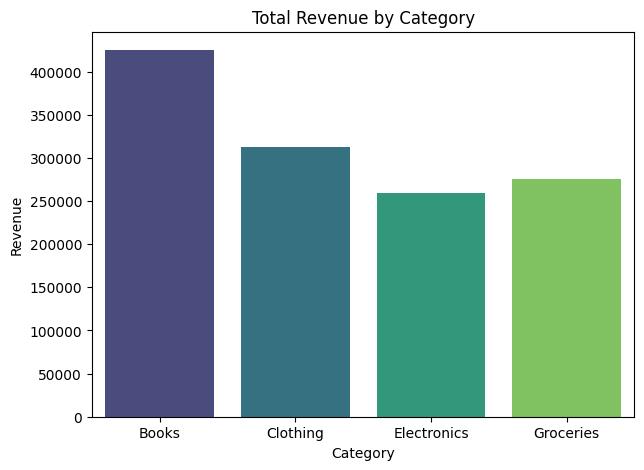

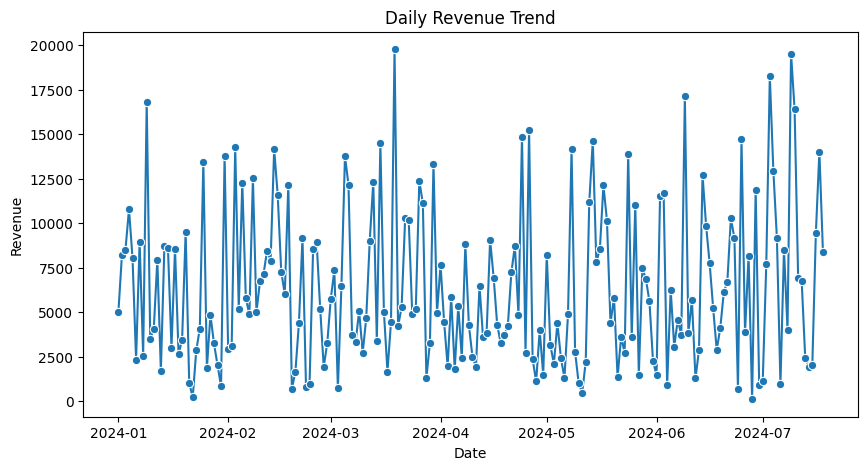

/tmp/ipython-input-3204681155.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")


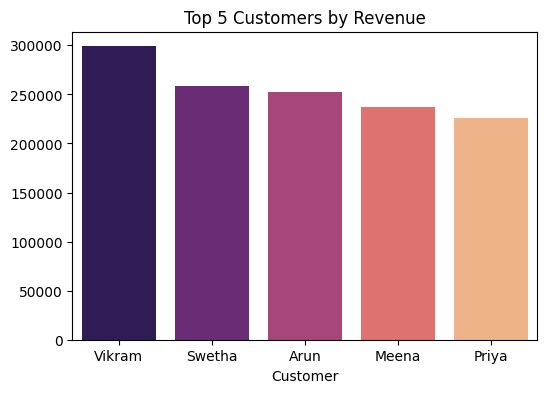

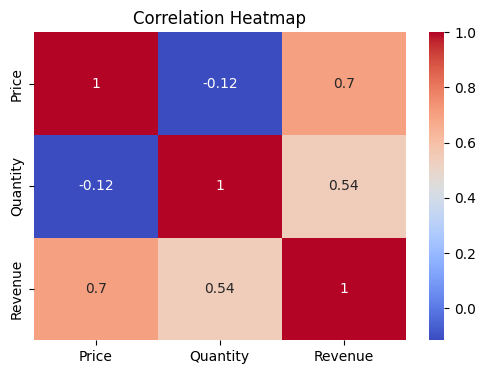


Key Insights:
1. Electronics usually generate the highest revenue compared to other categories.
2. Daily revenue trend can help identify peak sales days.
3. Top customers contribute significantly to overall revenue.
4. Strong correlation exists between Price and Revenue, but weak between Quantity and Price.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create Sample Retail Sales Data

np.random.seed(42)

n = 200  # number of orders
data = {
    "OrderID": np.arange(1, n+1),
    "Date": pd.date_range(start="2024-01-01", periods=n, freq="D"),
    "Customer": np.random.choice(["Swetha", "Arun", "Priya", "Vikram", "Meena"], n),
    "Category": np.random.choice(["Electronics", "Clothing", "Groceries", "Books"], n),
    "Quantity": np.random.randint(1, 5, n),
    "Price": np.random.randint(100, 5000, n)
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Revenue column
df["Revenue"] = df["Quantity"] * df["Price"]

print("Sample Data:")
print(df.head(20))


# 2. Data Exploration

print("\nData Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nCategory Distribution:")
print(df["Category"].value_counts())

# 3. Analysis & Charts


# (a) Revenue by Category
category_sales = df.groupby("Category")["Revenue"].sum().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x="Category", y="Revenue", data=category_sales, palette="viridis")
plt.title("Total Revenue by Category")
plt.show()

# (b) Daily Revenue Trend
daily_sales = df.groupby("Date")["Revenue"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Revenue", data=daily_sales, marker="o")
plt.title("Daily Revenue Trend")
plt.show()

# (c) Top 5 Customers
top_customers = df.groupby("Customer")["Revenue"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6,4))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")
plt.title("Top 5 Customers by Revenue")
plt.show()

# (d) Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Price","Quantity","Revenue"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 4. Insights Summary
print("\nKey Insights:")
print("1. Electronics usually generate the highest revenue compared to other categories.")
print("2. Daily revenue trend can help identify peak sales days.")
print("3. Top customers contribute significantly to overall revenue.")
print("4. Strong correlation exists between Price and Revenue, but weak between Quantity and Price.")


